In [1]:
import random
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

In [2]:
def gen(conditioning, p=True):
    c_color = random.randrange(430, 771)
    s_color = c_color - (random.randrange(50))
    delta = abs(c_color - s_color)
    redundance_test = None
    
    if p:
        print('\n'.join((
            f"Conditioning color is {c_color} nm",
            f"Conditioning intensity is {conditioning}",
            f"Stimulus color is {s_color} nm.",
            f"∆ (difference between colors) is {delta} nm.")
        ))

    if delta <= 40:
        redundance_test = abs(40 - delta)/40
        response = (conditioning * redundance_test) ** 2
        if p:
            return "\n".join((f"Redundance test is {redundance_test}",
                              f"Response is {response}.\n"))
        else:
            return delta, conditioning, response
    else:
        response = 0
        if p:
            return "Response is null.\n"
        else:
            return delta, conditioning, response

In [3]:
# Iterations
print(gen(1.0, p=True))
print(gen(1.25, p=True))
print(gen(1.5, p=True))

Conditioning color is 582 nm
Conditioning intensity is 1.0
Stimulus color is 561 nm.
∆ (difference between colors) is 21 nm.
Redundance test is 0.475
Response is 0.225625.

Conditioning color is 620 nm
Conditioning intensity is 1.25
Stimulus color is 612 nm.
∆ (difference between colors) is 8 nm.
Redundance test is 0.8
Response is 1.0.

Conditioning color is 692 nm
Conditioning intensity is 1.5
Stimulus color is 652 nm.
∆ (difference between colors) is 40 nm.
Redundance test is 0.0
Response is 0.0.



In [4]:
def plot_expo(conditioning, n, label):
    
    distribution = []
    for n in range(n+1):
        distribution.append(gen(conditioning, p=False))
        
    delta, response = [i[0] for i in distribution], [i[2] for i in distribution]
    
    normal = norm.fit(response)
    
    plt.xlim(0, 50)
    plt.ylim(0.0, 2.5)
    
    plt.xlabel("∆ nm")
    plt.ylabel("Degree of response")
    
    plt.grid(linestyle="--")
    plt.title(f"Exponential distribution of responses for {n} iterations.")

    def gauss_values():

        print(f"When conditioning degree is {conditioning},")
        print(f"µ = {np.mean(response)}")
        print(f"σ = {np.std(response)}\n")
    
    return plt.scatter(x=delta, y=response, label=f"{label} ({conditioning})"), gauss_values() 

When conditioning degree is 1.0,
µ = 0.2723332083958021
σ = 0.3053182657561186

When conditioning degree is 1.25,
µ = 0.43357032421289354
σ = 0.4861107758198228

When conditioning degree is 1.5,
µ = 0.6239758245877062
σ = 0.6890701521356901



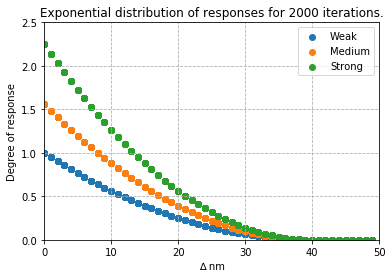

In [5]:
plot_expo(1.0, 2000, "Weak")
plot_expo(1.25, 2000, "Medium")
plot_expo(1.5, 2000, "Strong")

plt.legend(("Weak", "Medium", "Strong"))